In [1]:
!ls Data

SNN.webp         weather_data.csv


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse

from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import plotly.graph_objects as go
from yellowbrick.regressor import ResidualsPlot

In [3]:
df = pd.read_csv('Data/weather_data.csv', index_col = "DATE")
df.head()

STATION                                       NAME  AWND  \
DATE                                                                       
2010-01-01  USW00014914  FARGO HECTOR INTERNATIONAL AIRPORT, ND US  8.05   
2010-01-02  USW00014914  FARGO HECTOR INTERNATIONAL AIRPORT, ND US  2.91   
2010-01-03  USW00014914  FARGO HECTOR INTERNATIONAL AIRPORT, ND US  3.36   
2010-01-04  USW00014914  FARGO HECTOR INTERNATIONAL AIRPORT, ND US  0.67   
2010-01-05  USW00014914  FARGO HECTOR INTERNATIONAL AIRPORT, ND US  1.79   

              FMTM    PGTM  PRCP  SNOW  SNWD  TAVG  TMAX  ...  WT08  WT09  \
DATE                                                      ...               
2010-01-01  1148.0  1142.0   0.0   0.0  13.0   NaN    -5  ...   NaN   NaN   
2010-01-02  1322.0  1320.0   0.0   0.0  13.0   NaN    -9  ...   1.0   NaN   
2010-01-03  1328.0  1303.0   0.0   0.0  13.0   NaN    -2  ...   NaN   NaN   
2010-01-04  1850.0  1847.0   0.0   0.0  13.0   NaN     5  ...   NaN   NaN   
2010-01-05  2149.0  2145.0   0.0   0.0  13.0   NaN    10  ...   NaN   NaN   

            WT10  WT11  WT13  WT16  WT17  WT18  WT19  WT22  
DATE                                                        
2010-01-01   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN  
2010-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-01-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-01-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-01-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 33 columns]

In [4]:
df.shape

(4687, 33)

In [5]:
df.describe()

AWND         FMTM         PGTM         PRCP         SNOW  \
count  4684.000000   669.000000   690.000000  4687.000000  4683.000000   
mean     10.858901  1776.602392  1372.991304     0.061976     0.121076   
std       4.576646  1921.637384   652.940185     0.212719     0.606044   
min       0.670000     0.000000     0.000000     0.000000     0.000000   
25%       7.610000  1101.000000  1039.500000     0.000000     0.000000   
50%      10.290000  1446.000000  1427.000000     0.000000     0.000000   
75%      13.650000  1911.000000  1821.750000     0.010000     0.000000   
max      33.780000  9999.000000  2359.000000     3.770000    12.600000   

              SNWD         TAVG         TMAX         TMIN         WDF2  ...  \
count  4685.000000  3501.000000  4687.000000  4687.000000  4687.000000  ...   
mean      2.163799    44.209369    53.707062    33.072968   226.842330  ...   
std       4.561733    24.241202    25.965705    23.532585   102.006195  ...   
min       0.000000   -27.000000   -18.000000   -33.000000    10.000000  ...   
25%       0.000000    27.000000    33.000000    17.000000   150.000000  ...   
50%       0.000000    47.000000    57.000000    35.000000   220.000000  ...   
75%       2.000000    66.000000    77.000000    53.000000   330.000000  ...   
max      25.200000    89.000000   102.000000    76.000000   360.000000  ...   

        WT08  WT09  WT10  WT11   WT13   WT16  WT17   WT18  WT19  WT22  
count  893.0  90.0   4.0   9.0  344.0  368.0  11.0  273.0  44.0  60.0  
mean     1.0   1.0   1.0   1.0    1.0    1.0   1.0    1.0   1.0   1.0  
std      0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   0.0  
min      1.0   1.0   1.0   1.0    1.0    1.0   1.0    1.0   1.0   1.0  
25%      1.0   1.0   1.0   1.0    1.0    1.0   1.0    1.0   1.0   1.0  
50%      1.0   1.0   1.0   1.0    1.0    1.0   1.0    1.0   1.0   1.0  
75%      1.0   1.0   1.0   1.0    1.0    1.0   1.0    1.0   1.0   1.0  
max      1.0   1.0   1.0   1.0    1.0    1.0   1.0    1.0   1.0   1.0  

[8 rows x 31 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4687 entries, 2010-01-01 to 2022-10-31
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4687 non-null   object 
 1   NAME     4687 non-null   object 
 2   AWND     4684 non-null   float64
 3   FMTM     669 non-null    float64
 4   PGTM     690 non-null    float64
 5   PRCP     4687 non-null   float64
 6   SNOW     4683 non-null   float64
 7   SNWD     4685 non-null   float64
 8   TAVG     3501 non-null   float64
 9   TMAX     4687 non-null   int64  
 10  TMIN     4687 non-null   int64  
 11  WDF2     4687 non-null   int64  
 12  WDF5     4665 non-null   float64
 13  WESD     365 non-null    float64
 14  WSF2     4687 non-null   float64
 15  WSF5     4665 non-null   float64
 16  WT01     1570 non-null   float64
 17  WT02     244 non-null    float64
 18  WT03     218 non-null    float64
 19  WT04     2 non-null      float64
 20  WT05     98 non-null     float64
 21  WT06

## Data Cleaning & Preparation

In [7]:
# Checking the percentages of missing data in each column.
null_val = df.apply(pd.isnull).sum()/df.shape[0]
null_val

STATION    0.000000
NAME       0.000000
AWND       0.000640
FMTM       0.857265
PGTM       0.852784
PRCP       0.000000
SNOW       0.000853
SNWD       0.000427
TAVG       0.253040
TMAX       0.000000
TMIN       0.000000
WDF2       0.000000
WDF5       0.004694
WESD       0.922125
WSF2       0.000000
WSF5       0.004694
WT01       0.665031
WT02       0.947941
WT03       0.953488
WT04       0.999573
WT05       0.979091
WT06       0.993813
WT07       0.985918
WT08       0.809473
WT09       0.980798
WT10       0.999147
WT11       0.998080
WT13       0.926606
WT16       0.921485
WT17       0.997653
WT18       0.941754
WT19       0.990612
WT22       0.987199
dtype: float64

In [8]:
# Assigning columns with p value < .05 to a new variable.
weather_df = df.columns[null_val < .05]
weather_df

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN',
       'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

Seattle weather documentation:https://www.ncei.noaa.gov/data/daily-summaries/doc/GHCND_documentation.pdf

In [9]:
df_weather = df[['NAME','PRCP', 'AWND', 'SNOW', 'SNWD','TMAX', 'TMIN']].copy()

In [10]:
# Renaming my columns.
df_weather.columns = ['Name', 'Precip', 'Wind', 'Snow', 'Snow_depth', 'Temp_max', 
                      'Temp_min']
df_weather.head()

Name  Precip  Wind  Snow  \
DATE                                                                        
2010-01-01  FARGO HECTOR INTERNATIONAL AIRPORT, ND US     0.0  8.05   0.0   
2010-01-02  FARGO HECTOR INTERNATIONAL AIRPORT, ND US     0.0  2.91   0.0   
2010-01-03  FARGO HECTOR INTERNATIONAL AIRPORT, ND US     0.0  3.36   0.0   
2010-01-04  FARGO HECTOR INTERNATIONAL AIRPORT, ND US     0.0  0.67   0.0   
2010-01-05  FARGO HECTOR INTERNATIONAL AIRPORT, ND US     0.0  1.79   0.0   

            Snow_depth  Temp_max  Temp_min  
DATE                                        
2010-01-01        13.0        -5       -27  
2010-01-02        13.0        -9       -33  
2010-01-03        13.0        -2       -28  
2010-01-04        13.0         5       -12  
2010-01-05        13.0        10         3

In [11]:
df_weather.replace(to_replace = 'FARGO HECTOR INTERNATIONAL AIRPORT, ND US', 
                   value = 'Fargo', inplace = True)
df_weather

Name  Precip   Wind  Snow  Snow_depth  Temp_max  Temp_min
DATE                                                                  
2010-01-01  Fargo     0.0   8.05   0.0        13.0        -5       -27
2010-01-02  Fargo     0.0   2.91   0.0        13.0        -9       -33
2010-01-03  Fargo     0.0   3.36   0.0        13.0        -2       -28
2010-01-04  Fargo     0.0   0.67   0.0        13.0         5       -12
2010-01-05  Fargo     0.0   1.79   0.0        13.0        10         3
...           ...     ...    ...   ...         ...       ...       ...
2022-10-27  Fargo     0.0  14.32   NaN         NaN        53        39
2022-10-28  Fargo     0.0  12.30   0.0         0.0        63        37
2022-10-29  Fargo     0.0   6.71   0.0         0.0        60        35
2022-10-30  Fargo     0.0   5.14   0.0         0.0        59        25
2022-10-31  Fargo     0.0   8.50   0.0         0.0        65        32

[4687 rows x 7 columns]

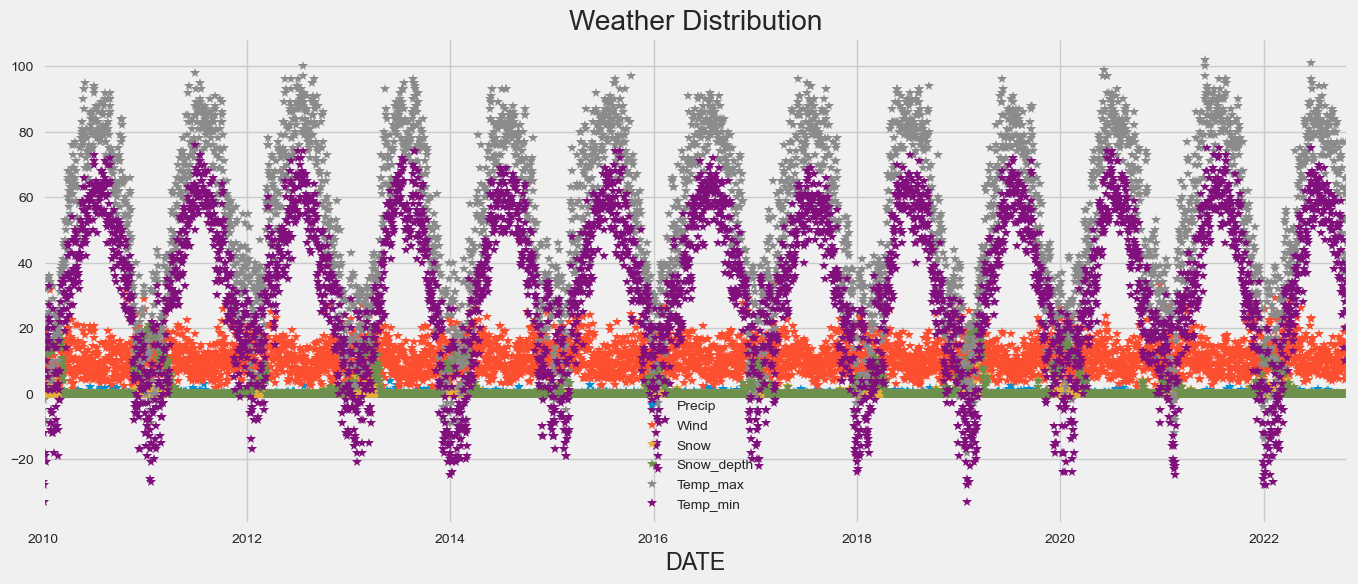

In [27]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
df_weather.index = pd.to_datetime(df_weather.index)

# Plotting daily distribution of weather.
df_weather.plot(style = '*',
        figsize = (15, 6),
        color = color_pal[:],
        title = 'Weather Distribution')
plt.show()

In [28]:
df_weather.isna().sum()

Name          0
Precip        0
Wind          0
Snow          0
Snow_depth    0
Temp_max      0
Temp_min      0
dtype: int64

In [29]:
# We have quite a few missing values here. We will just go ahead fill it using
# using fill forward method.
df_weather = df_weather.fillna(method = 'ffill')

In [30]:
df_weather.isna().sum()

Name          0
Precip        0
Wind          0
Snow          0
Snow_depth    0
Temp_max      0
Temp_min      0
dtype: int64

In [31]:
df_weather.dtypes

Name           object
Precip        float64
Wind          float64
Snow          float64
Snow_depth    float64
Temp_max        int64
Temp_min        int64
dtype: object

In [32]:
df_weather.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
               '2022-10-30', '2022-10-31'],
              dtype='datetime64[ns]', name='DATE', length=4687, freq=None)

## Exploritory Data Analysis

<Figure size 1800x600 with 0 Axes>

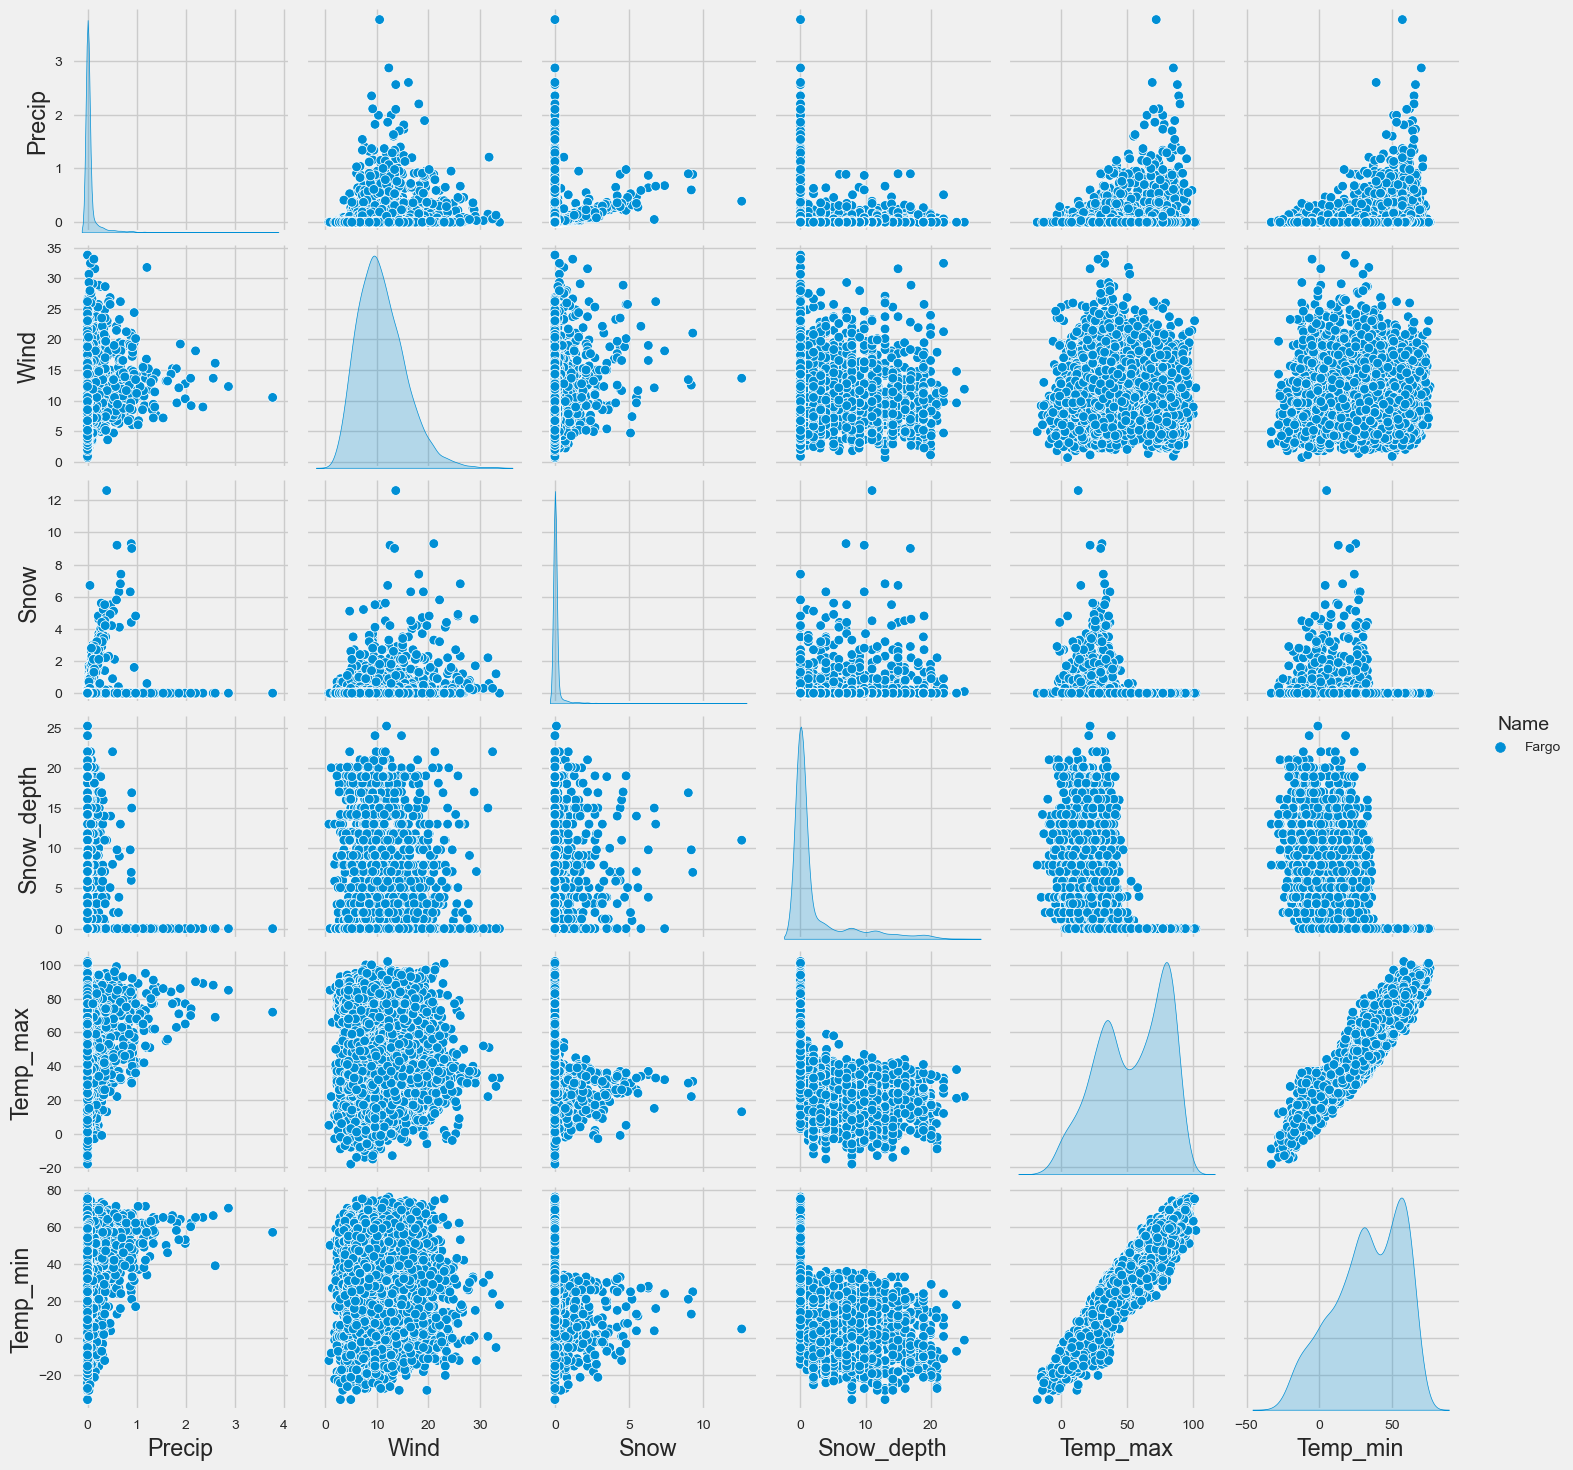

In [33]:
# Plotting the distribution of weather in my data.
plt.figure(figsize=(18,6))
sns.pairplot(df_weather,  hue = 'Name')
plt.show()

In [34]:
# Checking records of each year in our data.
df_weather.index.year.value_counts().sort_index()

2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    304
Name: DATE, dtype: int64

In [35]:
# Correlation of our data
corr = df_weather.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/ny/y4smplb93zn6dl4f36sqhd9h0000gn/T/ipykernel_17309/1053754333.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_weather.corr()
/var/folders/ny/y4smplb93zn6dl4f36sqhd9h0000gn/T/ipykernel_17309/1053754333.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


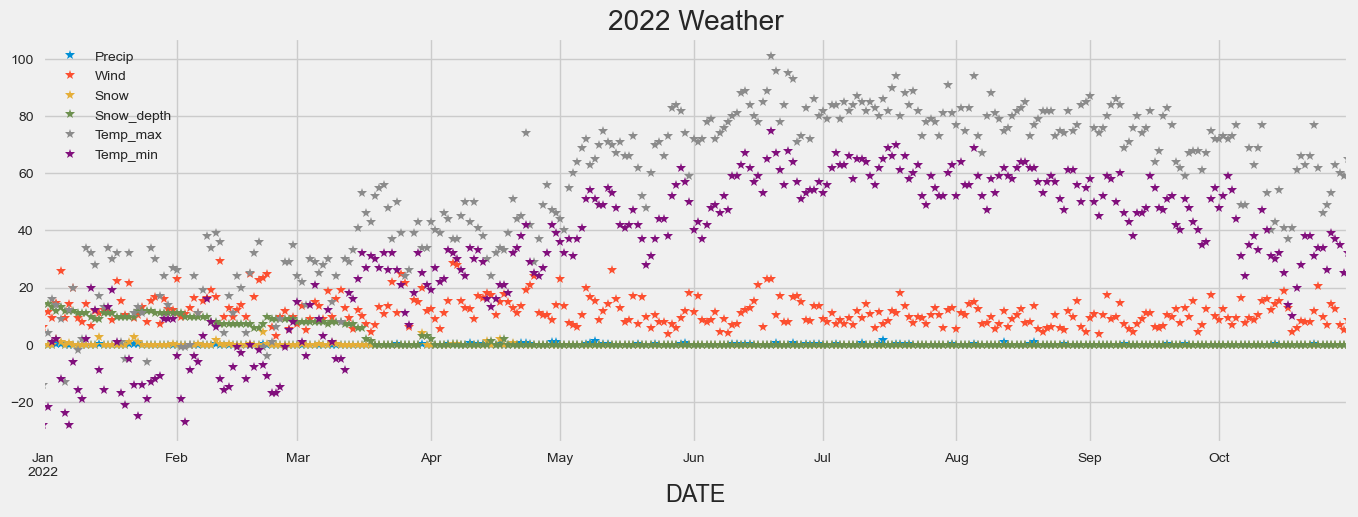

In [49]:
df_weather.loc[(df_weather.index >= '01-01-2022') & (df_weather.index < '11-01-2022')] \
    .plot(figsize = (15, 5), title = '2022 Weather', style = '*')
plt.show()

<AxesSubplot: title={'center': 'Temperature'}, xlabel='DATE'>

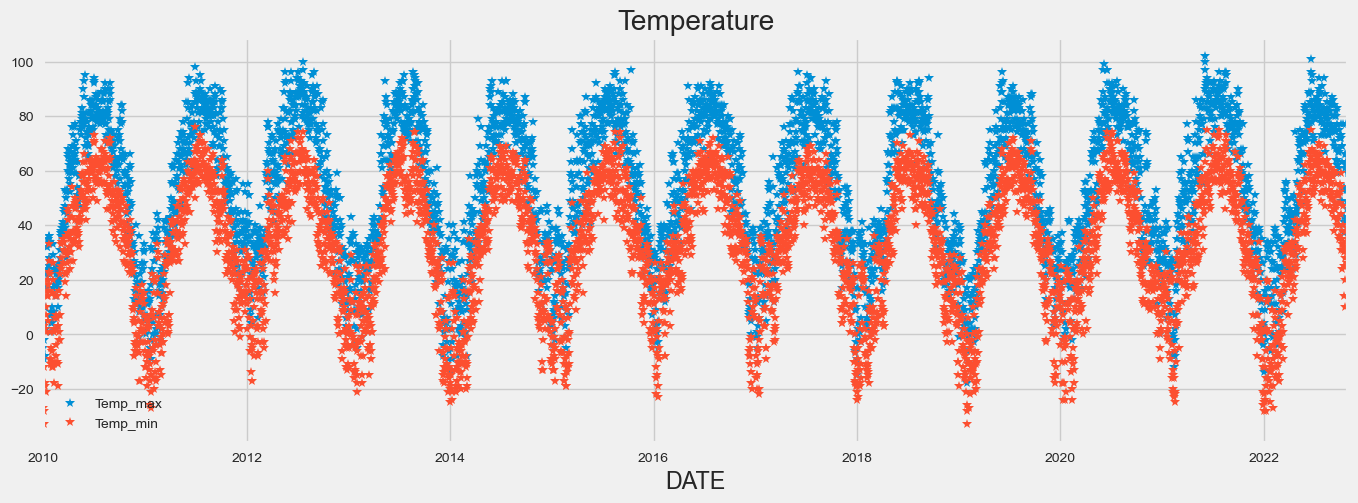

In [50]:
# Timeline plot of the daily temperatures
df_weather.plot(y = ['Temp_max', 'Temp_min'], figsize = (15, 5), 
        title = 'Temperature', style = '*')

In [51]:
# Visualing the Precipitation
fig = go.Figure(data=[go.Scatter(y = df_weather['Precip'])],
                layout = go.Layout(title = go.layout.Title(
                    text = 'Precipitation - Snow in Inches')))

fig.show()

<AxesSubplot: title={'center': 'Wind Speed'}, xlabel='DATE'>

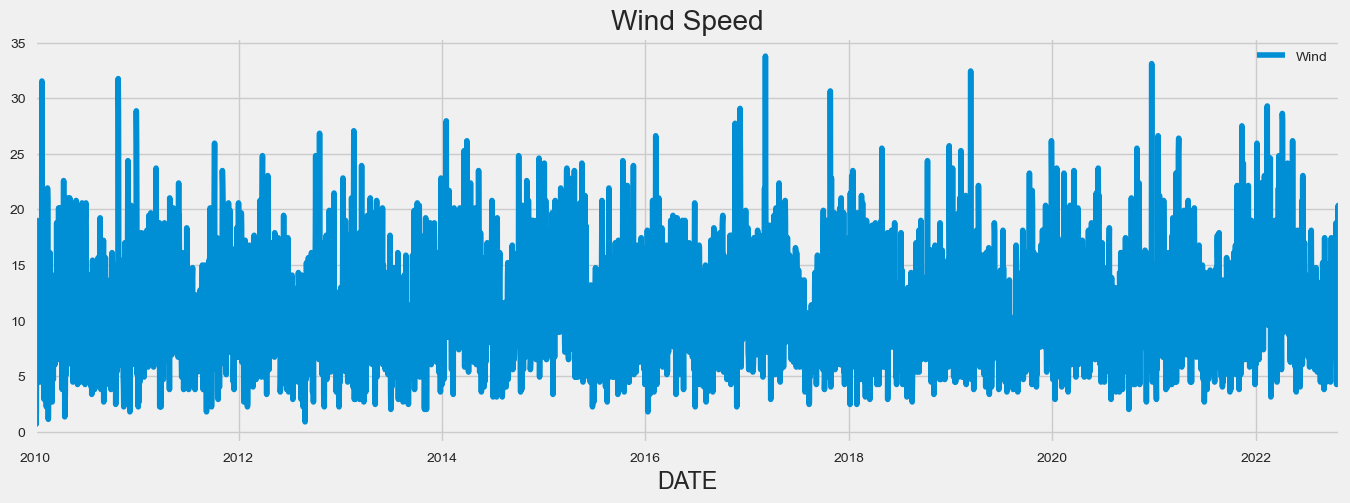

In [57]:
df_weather.plot(y = ['Wind'], figsize = (15, 5), 
        title = 'Wind Speed')

<AxesSubplot: title={'center': 'Snow'}, xlabel='DATE'>

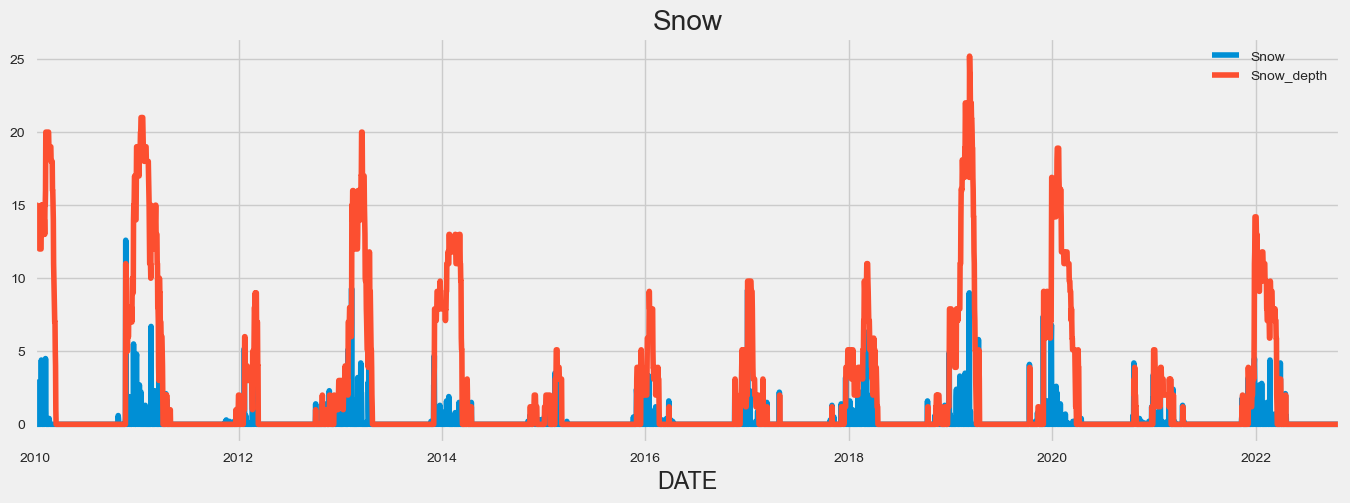

In [62]:
# Timeline plot of snow and snow_depth
df_weather.plot(y = ['Snow', 'Snow_depth'], figsize = (15, 5), 
        title = 'Snow', style = '-')

## Machine Learning Model

#### First Model: Temperature Prediction Using Linear Regression

In [63]:
# Defining my targets
X = df_weather['Temp_min'].values.reshape(-1,1)
y = df_weather['Temp_max'].values.reshape(-1,1)

In [64]:
# Train Test Split my data. Test size is 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [65]:
# Fitting the Linear Regression Classifier
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predicting the X_test results
y_pred = linreg.predict(X_test)

In [67]:
# Printing the prediction results
df_temp = pd.DataFrame({'Actual Temp': y_test.flatten(), 'Predicted Temp': y_pred.flatten()})
df_temp.head(4)

Actual Temp  Predicted Temp
0            7       13.742871
1           20       22.116221
2           91       89.103015
3           81       93.289690

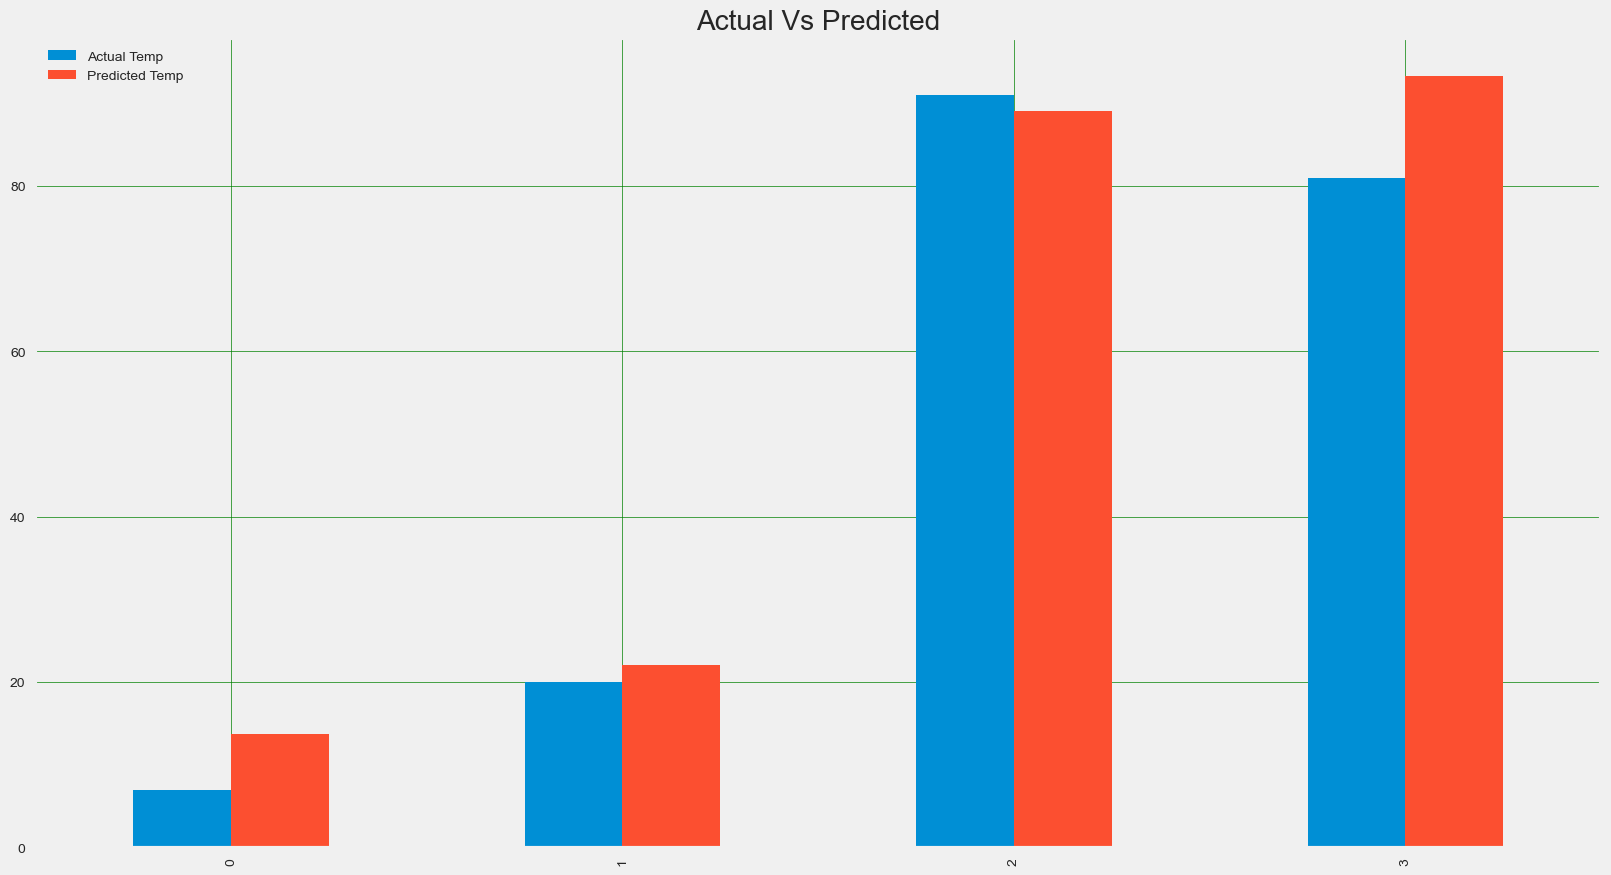

In [68]:
# Comparison of actual and predicted weather
df_temp1 = df_temp.head(4)
df_temp1.plot(kind = 'bar',figsize = (18,10), title = 'Actual Vs Predicted')
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

Our model prediction above looks great and relatively close the actual prediction number. However, its not precise.

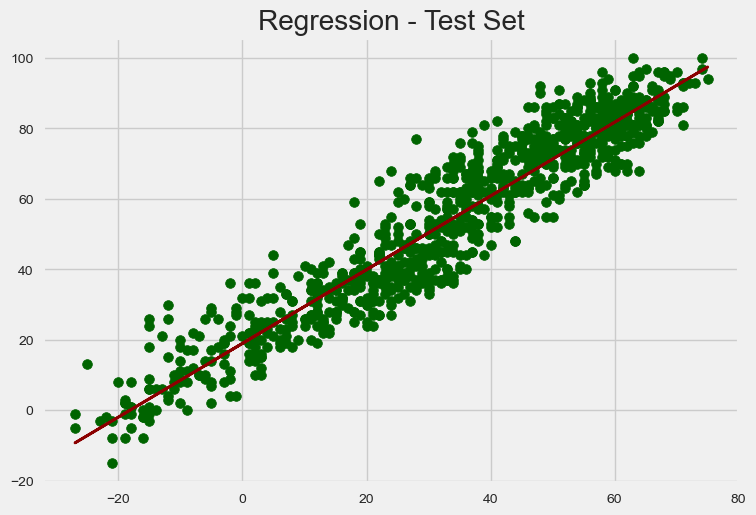

In [69]:
# Draw a Regression line on the Test Data 

plt.scatter(X_test, y_test,  color = 'Darkgreen')
plt.plot(X_test, y_pred, color = 'Darkred', linewidth = 2)
plt.title('Regression - Test Set')
plt.show()

According to the scatterplot & regression line above, our model seems to have a good fit on the X_test and y_test data. 

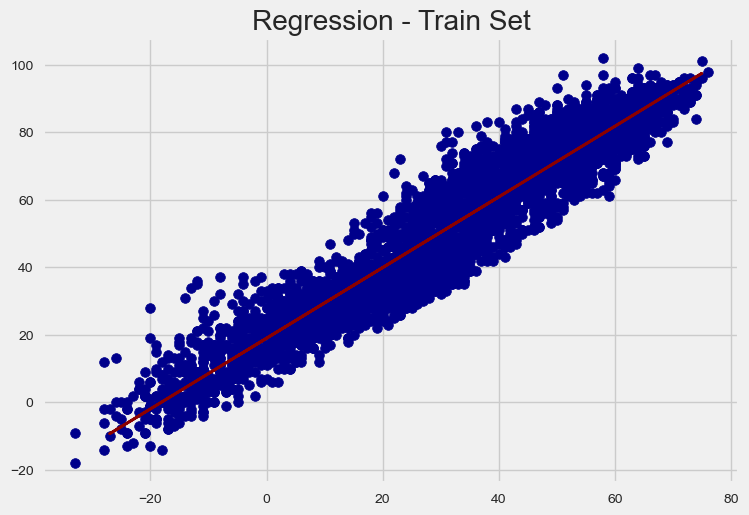

In [70]:
# Draw a Regression line on the Train Set

plt.scatter(X_train, y_train,  color = 'Darkblue')
plt.plot(X_test, y_pred, color = 'Darkred', linewidth = 2)
plt.title('Regression - Train Set')
plt.show()

In [71]:
from sklearn import metrics
# Analyzing our model

# Calculate the coefficients
print('Coefficients: \n', linreg.coef_)

# Calculate the mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# Calculate the mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

# Calculate the root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate the R-squared (or coefficient of determinationnote. 1 is a perfect prediction.
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred))

Coefficients: 
 [[1.04666866]]
Mean Absolute Error: 6.615709768853394
Mean Squared Error: 68.57005510837509
Root Mean Squared Error: 8.280703780982332
Coefficient of Determination: 0.8959329408609976


##### Interpreting Results:

- Mean Absolute Error is the amount of error in our model. It is the difference between the predicted value and the actual value. Our model MAE is 6.61% which is not bad.


- The MSE is the average squared distance between the observed and predicted values. Because it uses squared units rather than the natural data units, the interpretation is less intuitive. As showing in our MSE results above of 68.57% which is high. We can conclude say that since there is no correct answer for MSE, we cannot say that our model prediction is incorrect.


- Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response. Our model RMSE is 8.28 which is quite good as well.


- The Coefficient of Determination is about 90%, which is quite great. The higher the value the better the model.

In [78]:
# Checking model performance on Training and Test Data.
y_pred = linreg.predict(X_test)
print("Train MSE => {}\nTest MSE => {}"
      .format(mse(y_train, linreg.predict(X_train)), mse(y_test, y_pred)))

Train MSE => 66.44671072516161
Test MSE => 68.57005510837509


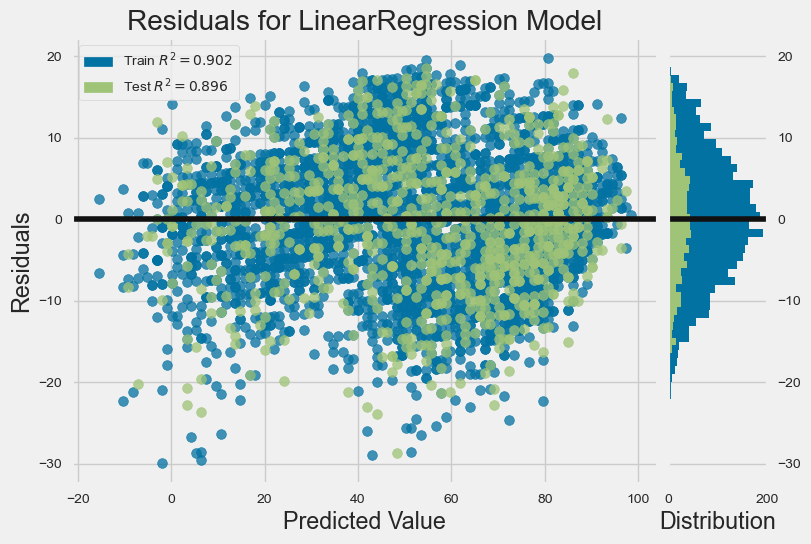

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [79]:
# To understand it much further we plot the Residual Plot for this model.

visualizer = ResidualsPlot(linreg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()

A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value. And from the above residual plot, we can say that our Linear Regression model is performing pretty good.

#### Second Model: Temperature Prediction Using XGBoost